In [1]:
import os
os.getcwd()
os.chdir(r"C:\Users\arunk\FraudDetection")
os.getcwd()

'C:\\Users\\arunk\\FraudDetection'

In [2]:
from fraudDetection.utils import read_yaml, create_directories
from pathlib import Path
from fraudDetection.constants import *

from fraudDetection.logger import logging
os.chdir(r"C:\Users\arunk\FraudDetection")

path = Path(r"configs/config.yaml")

config_info = read_yaml(path)


In [3]:
from fraudDetection.config.configuration import ConfigurationManager
config_info = ConfigurationManager(CONFIG_FILE_PATH)

In [4]:
from fraudDetection.config.configuration import DataIngestionConfig
from fraudDetection.exception import FraudDetectionException
data_ingestion_config=config_info.get_data_ingestion_config()

In [5]:
print(data_ingestion_config.ingested_dir)

artifacts\data_ingestion\2023-04-14-13-30-40\ingested_data


In [6]:
data_ingestion_config.raw_data_dir

WindowsPath('artifacts/data_ingestion/2023-04-14-13-30-40/raw_data')

In [20]:
data_ingestion_config.ingested_test_dir

WindowsPath('artifacts/data_ingestion/2023-04-14-13-30-40/test')

In [21]:
import os

string = "kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset"

filename = os.path.basename(string.split()[-1])

print(filename)


online-payments-fraud-detection-dataset


In [41]:
string.split()[-1]

'rupakroy/online-payments-fraud-detection-dataset'

In [61]:
import os
import shutil
from fraudDetection.utils import create_directories ,read_yaml
from fraudDetection.entity import DataIngestionConfig
from fraudDetection.config.configuration import ConfigurationManager
cm = ConfigurationManager(CONFIG_FILE_PATH)
training_config = cm.get_training_pipeline_config()
root_dir = training_config.artifacts_root
config_info = read_yaml(CONFIG_FILE_PATH)
config = config_info[DATA_INGESTION_CONFIG_KEY]
raw_data_dir = Path(os.path.join(root_dir,config[DATA_INGESTION_RAW_DATA_DIR_KEY]))

# data_ingestion_config = DataIngestionConfig(
#     raw_data_dir= Path(os.path.join(root_dir,config[DATA_INGESTION_RAW_DATA_DIR_KEY])),
#     ingested_dir=config[DATA_INGESTION_INGESTED_DIR_KEY],
#     ingested_test_dir=config[DATA_INGESTION_TRAIN_DIR_KEY],
#     ingested_train_dir=config[DATA_INGESTION_TRAIN_DIR_KEY],
#     unzip_dir=config[DATA_INGESTION_UNZIP_DIR_KEY],
#     source_url=config[DATA_INGESTION_URL_KEY]
# )
dataset_name = "rupakroy/online-payments-fraud-detection-dataset"

tgz_file_path = os.path.join(raw_data_dir, dataset_name + ".zip")
create_directories([tgz_file_path])
if not os.path.exists(tgz_file_path):
    os.system(f'kaggle datasets download -d {dataset_name} -p "{tgz_file_path}"')
    shutil.move(os.path.join(tgz_file_path, dataset_name + ".zip"), tgz_file_path)


In [55]:
type(data_ingestion_config)

fraudDetection.entity.config_entity.DataIngestionConfig

In [ ]:
from zipfile import ZipFile
from fraudDetection.components.data_ingestion import DataIngestion
from fraudDetection.config.configuration import ConfigurationManager
from fraudDetection.entity import DataIngestionConfig, DataIngestionArtifact
from pathlib import Path
import os 
os.chdir(r"C:\Users\arunk\FraudDetection")

CONFIG_FILE_PATH = Path("configs\config.yaml")
raw_data_dir = Path(r"C:\Users\arunk\FraudDetection\artifacts\data_ingestion\raw_data")
config = ConfigurationManager(CONFIG_FILE_PATH)
data_ingestion_config = config.get_data_ingestion_config()
config = DataIngestion(data_ingestion_config)
file = Path("artifacts\data_ingestion\zip_data\online-payments-fraud-detection-dataset.zip")

with ZipFile(file=file,mode='r') as zip_ref:
    zip_ref.extractall(raw_data_dir)

In [3]:
import pandas as pd
df = pd.read_csv(Path(r"C:\Users\arunk\FraudDetection\artifacts\data_ingestion\raw_data\PS_20174392719_1491204439457_log.csv"))
import sys,os 
from sklearn.model_selection import train_test_split
from pathlib import Path
from fraudDetection.exception import FraudDetectionException

train_file_path = r"C:\Users\arunk\FraudDetection\artifacts\data_ingestion\train\PS_20174392719_1491204439457_log.csv"
test_file_path = r"C:\Users\arunk\FraudDetection\artifacts\data_ingestion\test\PS_20174392719_1491204439457_log.csv"
chunk_size=10000
file_path = r"C:\Users\arunk\FraudDetection\artifacts\data_ingestion\raw_data\PS_20174392719_1491204439457_log.csv"
df = pd.read_csv(file_path)

strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df['isFraud'])


In [ ]:
def save_file(df, file_path) -> None:
            try:
                for i, (index,chunk) in enumerate(df.groupby(df.index // chunk_size)):
                    path = Path(f"file_{i}.csv")
                    print(type(chunk))
                    print(chunk)
                    chunk_file_path: Path = Path(file_path/path)
                    chunk.to_csv(chunk_file_path, index=False, header=i == 0)
            except Exception as e:
                raise FraudDetectionException(e, sys) from e

save_file(strat_test_set, test_file_path)
save_file(strat_train_set, train_file_path)



In [2]:
from fraudDetection.utils import create_directories
import os
from pathlib import Path
print(os.getcwd())
path = Path("./testingpath/mypath/subpath")
create_directories([path])


c:\Users\arunk\FraudDetection\notebook


In [7]:
def check_class_balance():

    # compute class proportions in the training set
    train_counts = strat_train_set['isFraud'].value_counts()
    train_proportions = train_counts / len(strat_train_set)

    # compute class proportions in the test set
    test_counts = strat_test_set['isFraud'].value_counts()
    print(type(test_counts))
    test_proportions = test_counts / len(strat_test_set)
    print(test_counts,"/n",type(test_proportions))
    # print the class proportions
    print('Training set class proportions:')
    print(train_proportions)
    print()
    print('Test set class proportions:')
    print(test_proportions)

    # check if the class proportions are proportional
    if abs(train_proportions[0] - test_proportions[0]) <= 0.05 and abs(train_proportions[1] - test_proportions[1]) <= 0.05:
        print('The class proportions are proportional.')
    else:
        print('The class proportions are not proportional.')
check_class_balance()

<class 'pandas.core.series.Series'>
0    1270881
1       1643
Name: isFraud, dtype: int64 /n <class 'pandas.core.series.Series'>
Training set class proportions:
0    0.998709
1    0.001291
Name: isFraud, dtype: float64

Test set class proportions:
0    0.998709
1    0.001291
Name: isFraud, dtype: float64
The class proportions are proportional.


In [2]:
import numpy as np
n_samples = 1270881+1643
y_train_c= {0:1270881,1:1643} 
# weights = {0: n_samples / (2 * np.bincount(y_train_c)[0]), 1: n_samples / (2 * np.bincount(y_train_c)[1])}
weights = {0: n_samples / (2 *1270881), 1: n_samples / (2 * 1643)}

weights

{0: 0.5006464019841355, 1: 387.25623858794887}

In [12]:
series = pd.Series([100,200,300,400,500],[200,2000,300,400,700])
print(series)
series/len(series)

200     100
2000    200
300     300
400     400
700     500
dtype: int64


200      20.0
2000     40.0
300      60.0
400      80.0
700     100.0
dtype: float64

In [15]:
t = ([100,200,300,400,500],[200,2000,300,400,700],[10,40,50,90,80])
df =pd.DataFrame(t)
df/3

,0,1,2,3,4
0,33.333333,66.666667,100.000000,133.333333,166.666667
1,66.666667,666.666667,100.000000,133.333333,233.333333
2,3.333333,13.333333,16.666667,30.000000,26.666667


In [2]:
import os
os.chdir(r"C:\Users\arunk\FraudDetection")
from fraudDetection.utils import read_yaml
from pathlib import Path
schema_file_path = Path(r"configs\schema.yaml")

schema = read_yaml(schema_file_path)



In [14]:
key = schema.keys()
keys = schema.columns
keys.amount

'float64'

In [3]:
from pathlib import Path
import pandas as pd
import os
os.chdir(r"C:\Users\arunk\FraudDetection")
test_file_path = Path(r"artifacts\data_ingestion\test\file_0.csv")
train_file_path= Path(r"artifacts\data_ingestion\train\file_0.csv")

test_df= pd.read_csv(test_file_path)
train_df = pd.read_csv(train_file_path)

In [5]:
train_df.dtypes.equals(test_df.dtypes)

True

In [70]:
# concate all  the files in the train and test directory and convert them to dataframe
train_file_dir = Path(r"C:\Users\arunk\FraudDetection\artifacts\data_ingestion\train")
test_file_dir = Path(r"C:\Users\arunk\FraudDetection\artifacts\data_ingestion\test")
train_files= os.listdir(train_file_dir)[:2]
test_files = os.listdir(test_file_dir)[:2]

#number of files in each test and train dir
num_files_train = len([f for f in train_files if os.path.isfile(os.path.join(train_file_dir, f)) if f.endswith('.csv')])
num_files_test = len([f for f in test_files if os.path.isfile(os.path.join(test_file_dir, f)) if f.endswith('.csv')])

def concat_csv_files(files: list, file_dir: str) -> pd.DataFrame:
    dfs =[]    
    for i, file in enumerate(files):
        if file.endswith('.csv'):
            path = os.path.join(file_dir,file)
            df = pd.read_csv(path)
            dfs.append(df)
    return pd.concat(dfs)

train_df = concat_csv_files(train_files,train_file_dir)
test_df = concat_csv_files(test_files,test_file_dir)

In [77]:
train_df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [18]:
from fraudDetection.utils import read_yaml
schema_keys = read_yaml(Path(r"configs\schema.yaml"))
column_schema = schema_keys["columns"]

In [10]:
missing_cols = [col for col in column_schema if col not in train_df.columns]
mismatch_dtype_cols = [col for col, dtype in column_schema.items() if col in train_df.columns and train_df[col].dtype !=dtype]
if missing_cols:
    raise Exception (f"The following columns are missing from the DataFrame schema: {missing_cols}")
elif mismatch_dtype_cols:
    raise Exception (f"The following columns data types does not match: {mismatch_dtype_cols}")
else:
    print("All columns are present in the DataFrame schema and have the expected data types.")
    logging.info(f"train test file schema are as per the Schema {column_schema}")
        

All columns are present in the DataFrame schema and have the expected data types.


In [22]:
schema_keys

ConfigBox({'columns': {'step': 'int64', 'type': 'object', 'amount': 'float64', 'oldbalanceOrg': 'float64', 'newbalanceOrig': 'float64', 'oldbalanceDest': 'float64', 'newbalanceDest': 'float64', 'isFraud': 'int64'}, 'categorical_columns': ['type'], 'numerical_columns': ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], 'target_column': ['isFraud']})

In [91]:
if len(train_df.columns) != len(column_series):
    train_df = train_df.loc[:,column_schema]
    test_df = test_df.loc[:,column_schema]

if train_df.dtypes.equals(column_series):
    print(True)


True


In [92]:
print(len(train_df.columns))
print(len(column_series))
column_series

10
10


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [99]:
(test_df.isnull().sum() / len(test_df)) * 100
50/100

0.5

In [103]:
if train_df.isnull().sum().sum() > 0:
    print(True)
else:
    print(False)

False


In [13]:
import os

print(os.getcwd())
import numpy as np
from pathlib import Path

transformed = Path('afile.npy')

train_arr = np.array([[1,2,3],[12,3,4]])
with open(transformed, 'wb') as f:
    np.save(f,transformed)


C:\Users\arunk\FraudDetection


In [14]:
file = 'test.npy'
with open(file, 'wb') as f:
    np.save(f, np.array([1, 2]))
    np.save(f, np.array([1, 3]))
# with open('test.npy', 'rb') as f:
#     a = np.load(f)
#     b = np.load(f)
# print(a, b)

In [12]:
import os, sys
from box import ConfigBox
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesRegressor
from joblib import Memory
from fraudDetection.exception import FraudDetectionException
from fraudDetection.logger import logging
from fraudDetection.constants import *
from fraudDetection.entity import DataIngestionArtifact, DataTransformationConfig, DataValidationArtifact, DataTransformationArtifact
from fraudDetection.utils import save_object, read_yaml, load_data, save_numpy_array_data

In [16]:
os.chdir(r'C:\Users\arunk\FraudDetection')
os.getcwd()

'C:\\Users\\arunk\\FraudDetection'

In [1]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


In [2]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


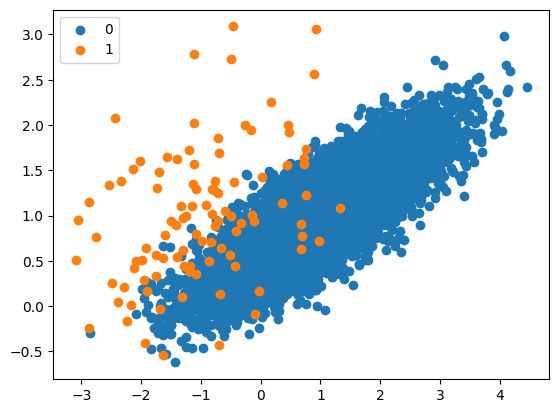

In [18]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
 
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [20]:
import pandas as pd

df = pd.read_csv(r"C:\Users\arunk\FraudDetection\artifacts\data_ingestion\raw_data\PS_20174392719_1491204439457_log.csv")

In [24]:
df['isFraud']

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [ ]:
from collections import Counter
from matplotlib import pyplot  as plt
from numpy import where
X,y = df.iloc[:,0:-2],df.iloc[:,-2]

counter = Counter(y)
print(counter)


In [52]:
total = counter[0]+counter[1]
counter[0]/total

0.9987091795518198

In [53]:
counter[1]/total

0.001290820448180152

In [5]:
from imblearn.over_sampling import BorderlineSMOTE
print(BorderlineSMOTE.__name__)
print(BorderlineSMOTE.__class__)
BorderlineSMOTE.__annotations__

BorderlineSMOTE
<class 'abc.ABCMeta'>


{'_parameter_constraints': dict}

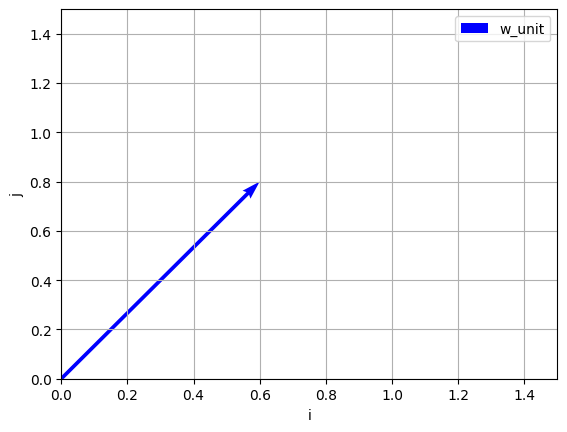

In [1]:
import matplotlib.pyplot as plt

# Define the components of the normalized vector w_unit
w_unit_i = 3/5
w_unit_j = 4/5

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the vector w_unit as an arrow starting from the origin (0,0)
ax.quiver(0, 0, w_unit_i, w_unit_j, angles='xy', scale_units='xy', scale=1, color='b', label='w_unit')

# Set axis limits and labels
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.5)
ax.set_xlabel('i')
ax.set_ylabel('j')

# Add a legend
ax.legend()

# Show the plot
plt.grid()
plt.show()


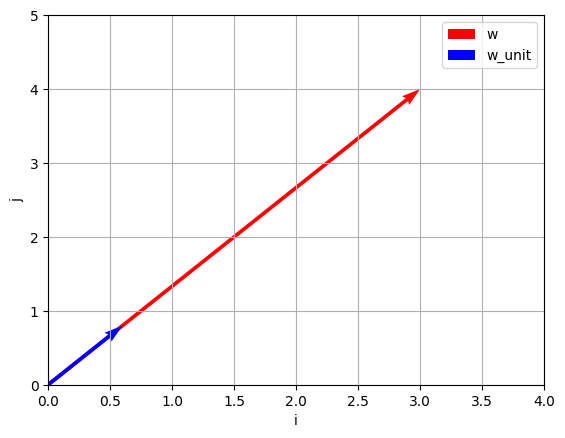

In [2]:
import matplotlib.pyplot as plt
import math

# Define the components of the original vector 'w'
w1 = 3
w2 = 4

# Calculate the magnitude (norm) of 'w'
w_magnitude = math.sqrt(w1**2 + w2**2)

# Normalize 'w' to create the unit vector 'w_unit'
w_unit_i = w1 / w_magnitude
w_unit_j = w2 / w_magnitude

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the original vector 'w' as an arrow starting from the origin (0,0)
ax.quiver(0, 0, w1, w2, angles='xy', scale_units='xy', scale=1, color='r', label='w')

# Plot the normalized vector 'w_unit' as an arrow starting from the origin (0,0)
ax.quiver(0, 0, w_unit_i, w_unit_j, angles='xy', scale_units='xy', scale=1, color='b', label='w_unit')

# Set axis limits and labels
ax.set_xlim(0, 4)
ax.set_ylim(0, 5)
ax.set_xlabel('i')
ax.set_ylabel('j')

# Add a legend
ax.legend()

# Show the plot
plt.grid()
plt.show()


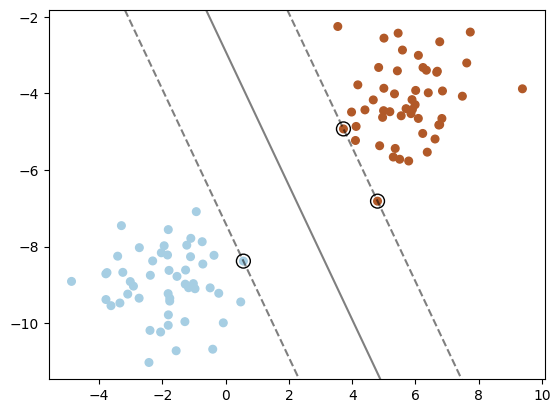

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# Generate a toy dataset with two classes
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear', C=1000)  # C is the regularization parameter

# Train the SVM classifier on the data
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = clf.decision_function(xy).reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors (points on margins)
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# Highlight the margin
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()
